# 1 – EDA

# 2 – Preprocessamento

# 3 – Modelo

# 4 – Avaliar (Métricas)

# 5 – EDA de cada cluster

### É pra fazer um modelo de cluster não supervisionado

### DBSCAN e K-means

### Usar PCA ou Kernel PCA

# 1. EDA — Análise Exploratória de Dados

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
plt.style.use("ggplot")
sns.set_palette("Set2")

# Carregar os datasets
train = pd.read_csv("Train.csv")

print(f"Dimensões: {train.shape}")
train.head()

Dimensões: (8068, 11)


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


### Estrutura dos dados

In [71]:
train.info()
train.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
count,8068.000000,8068,7928,8068.000000,7990,7944,7239.000000,8068,7733.000000,7992,8068
unique,NaN,2,2,NaN,2,9,NaN,3,NaN,7,4
top,NaN,Male,Yes,NaN,Yes,Artist,NaN,Low,NaN,Cat_6,D
freq,NaN,4417,4643,NaN,4968,2516,NaN,4878,NaN,5238,2268
mean,463479.214551,NaN,NaN,43.466906,NaN,NaN,2.641663,NaN,2.850123,NaN,NaN
std,2595.381232,NaN,NaN,16.711696,NaN,NaN,3.406763,NaN,1.531413,NaN,NaN
min,458982.000000,NaN,NaN,18.000000,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN
25%,461240.750000,NaN,NaN,30.000000,NaN,NaN,0.000000,NaN,2.000000,NaN,NaN
50%,463472.500000,NaN,NaN,40.000000,NaN,NaN,1.000000,NaN,3.000000,NaN,NaN
75%,465744.250000,NaN,NaN,53.000000,NaN,NaN,4.000000,NaN,4.000000,NaN,NaN


### Valores ausentes

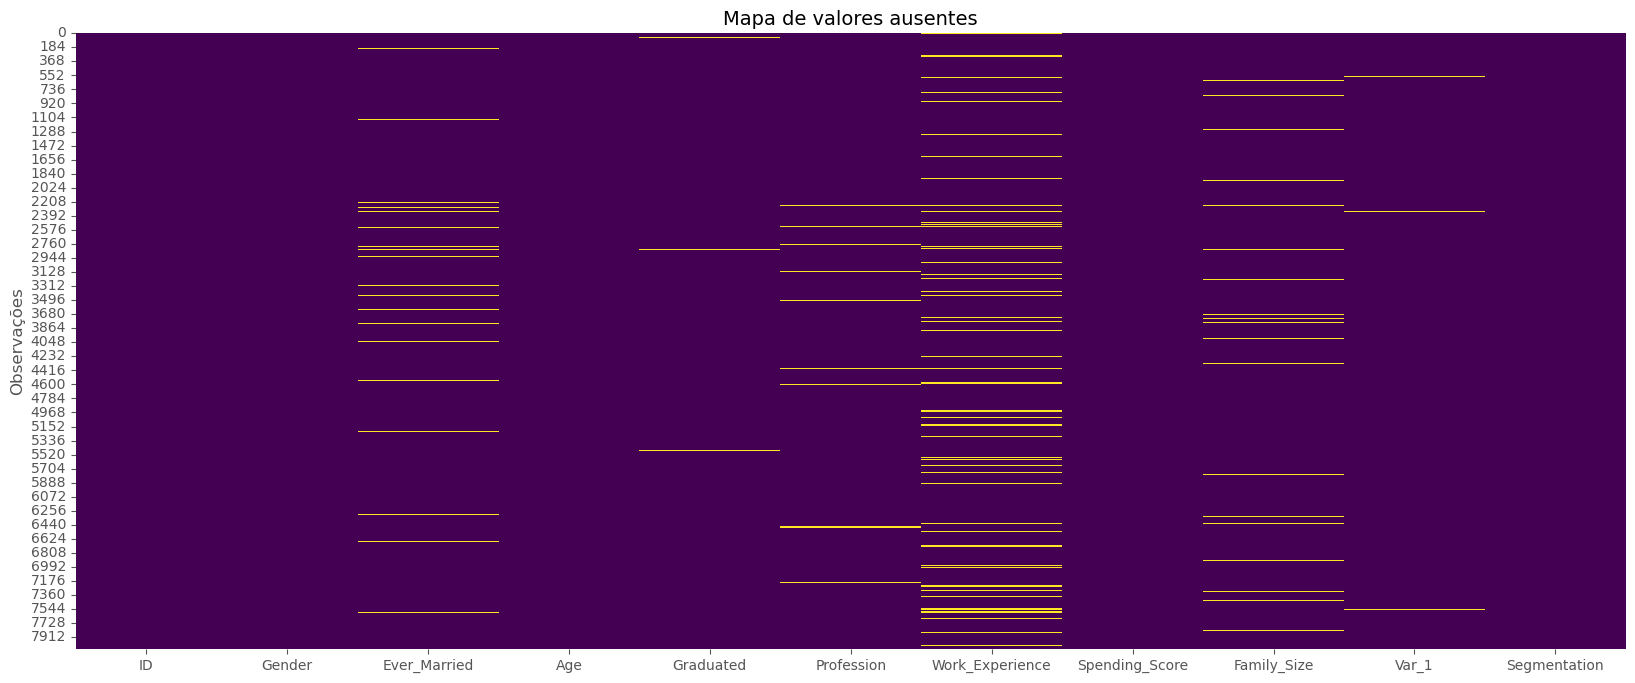

In [93]:
plt.figure(figsize=(20,8))
sns.heatmap(train.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de valores ausentes", fontsize=14)
plt.ylabel("Observações")
plt.show()

In [75]:
train.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

### Distribuição da variável Segmentation

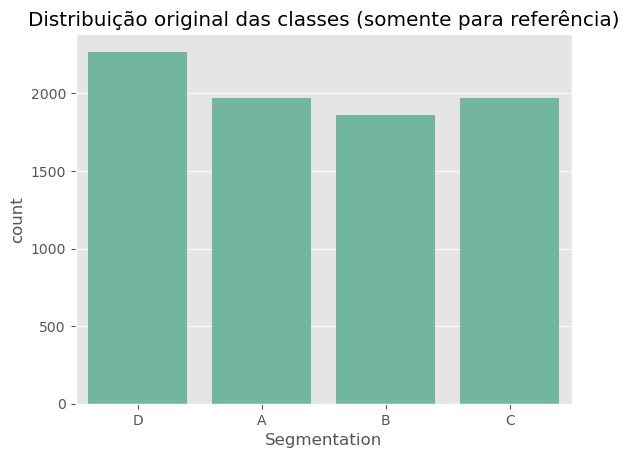

In [94]:
sns.countplot(data=train, x="Segmentation")
plt.title("Distribuição original das classes (somente para referência)")
plt.show()

### Distribuição das variáveis numéricas

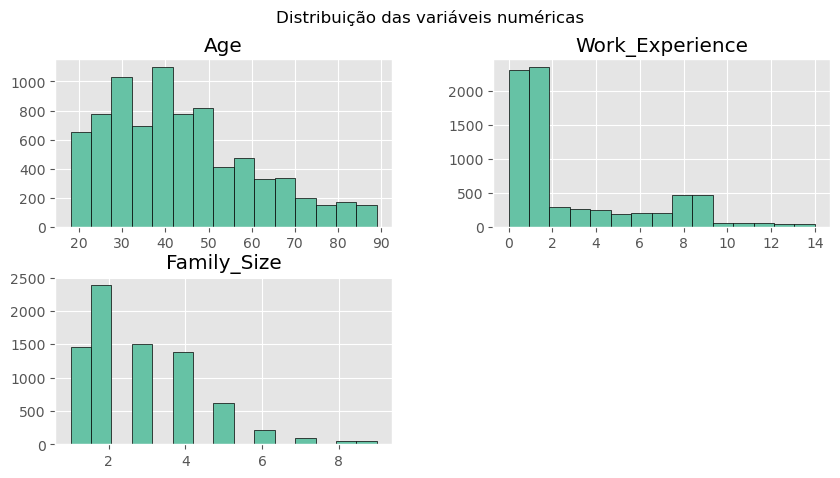

In [43]:
num_cols = ['Age', 'Work_Experience', 'Family_Size']

train[num_cols].hist(figsize=(10,5), bins=15, edgecolor='black')
plt.suptitle("Distribuição das variáveis numéricas")
plt.show()

### Relação entre variáveis e segmentação

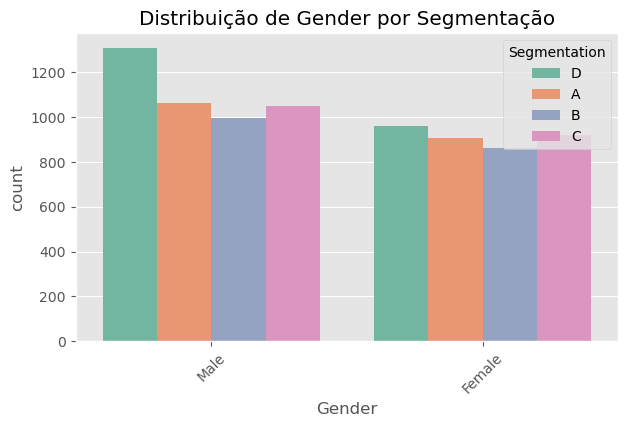

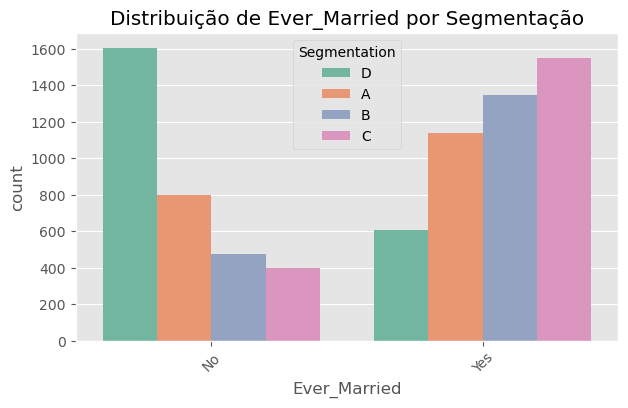

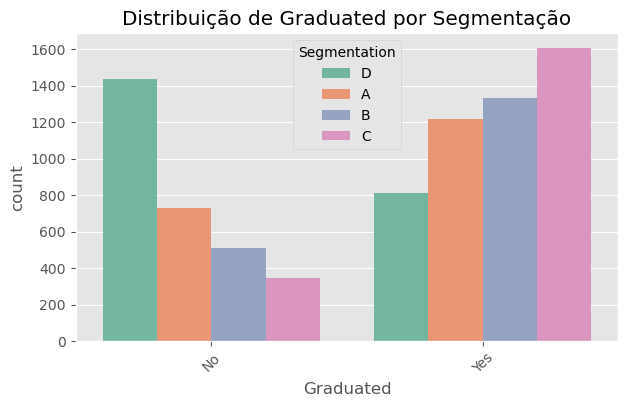

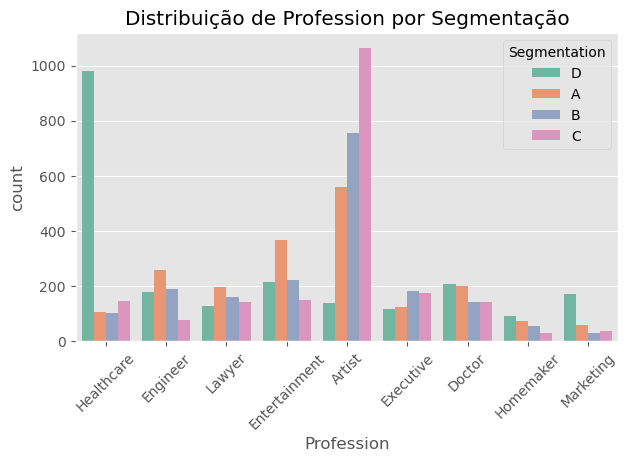

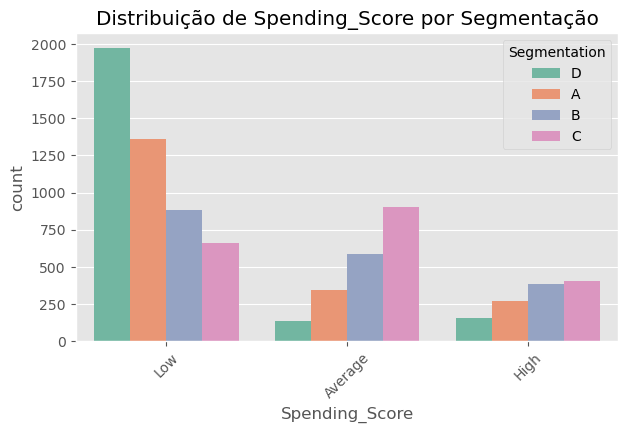

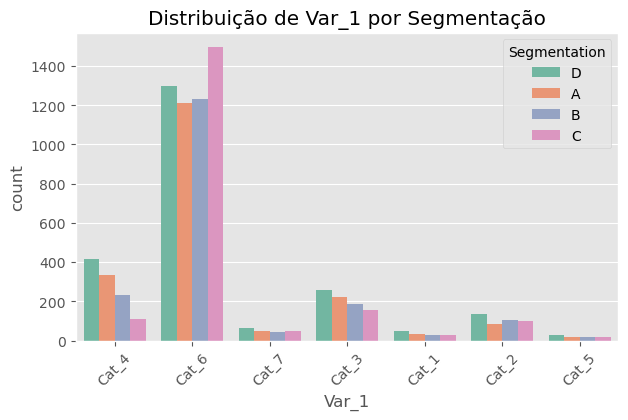

In [95]:
cat_cols = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']

for col in cat_cols:
    plt.figure(figsize=(7,4))
    sns.countplot(data=train, x=col, hue="Segmentation")
    plt.title(f"Distribuição de {col} por Segmentação")
    plt.xticks(rotation=45)
    plt.show()

# 2. Pré-processamento

### Tratando valores ausentes

In [96]:
for col in train.columns:
    if train[col].dtype == 'object':
        train[col].fillna(train[col].mode()[0], inplace=True)
    else:
        train[col].fillna(train[col].median(), inplace=True)

train.isnull().sum()

C:\Users\PC\AppData\Local\Temp\ipykernel_14380\2349684701.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(train[col].median(), inplace=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_14380\2349684701.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

### Codificar variáveis categóricas

In [97]:
from sklearn.preprocessing import LabelEncoder

In [98]:
df_cluster = train.drop(columns=['ID', 'Segmentation'])

cat_cols = df_cluster.select_dtypes('object').columns
le = LabelEncoder()
for col in cat_cols:
    df_cluster[col] = le.fit_transform(df_cluster[col])

df_cluster.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,1,0,22,0,5,1.0,2,4.0,3
1,0,1,38,1,2,1.0,0,3.0,3
2,0,1,67,1,2,1.0,2,1.0,5
3,1,1,67,1,7,0.0,1,2.0,5
4,0,1,40,1,3,1.0,1,6.0,5


### Normalização

In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

X_scaled[:5]

array([[ 0.90916397, -1.2066533 , -1.28462344, -1.29219005,  0.88660683,
        -0.45113599,  0.754462  ,  0.76269849, -0.80837004],
       [-1.0999116 ,  0.82873846, -0.32715082,  0.77387997, -0.29390982,
        -0.45113599, -1.60301259,  0.09580227, -0.80837004],
       [-1.0999116 ,  0.82873846,  1.40826831,  0.77387997, -0.29390982,
        -0.45113599,  0.754462  , -1.23799017,  0.60071054],
       [ 0.90916397,  0.82873846,  1.40826831,  0.77387997,  1.67361792,
        -0.7574104 , -0.4242753 , -0.57109395,  0.60071054],
       [-1.0999116 ,  0.82873846, -0.20746674,  0.77387997,  0.09959573,
        -0.45113599, -0.4242753 ,  2.09649094,  0.60071054]])

# 3. Modelo — PCA + K-Means / DBSCAN

### Redução de dimensionalidade (PCA)

In [101]:
from sklearn.decomposition import PCA

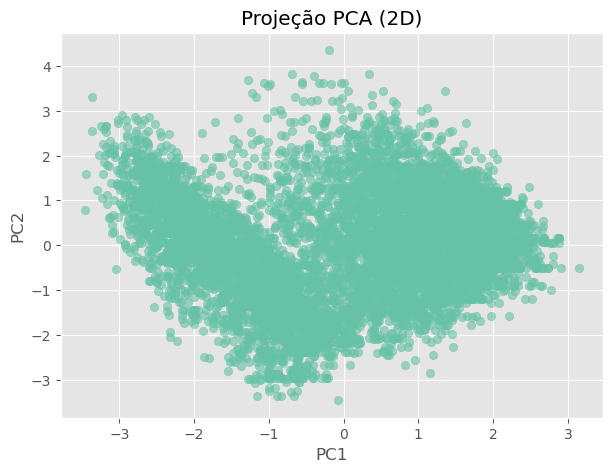

In [102]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.6)
plt.title("Projeção PCA (2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

### K-Means

In [103]:
from sklearn.cluster import KMeans

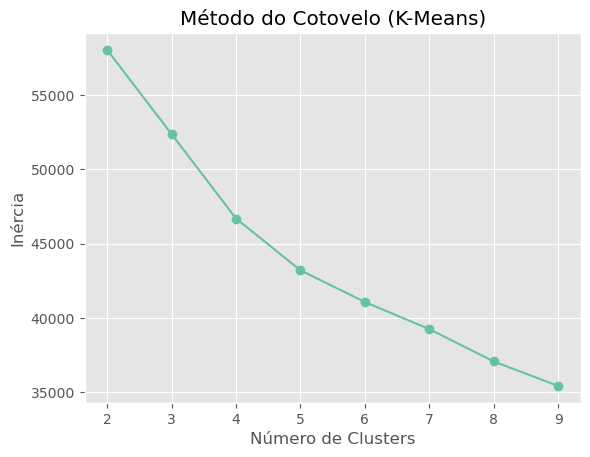

In [104]:
inertia = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'o-')
plt.title("Método do Cotovelo (K-Means)")
plt.xlabel("Número de Clusters")
plt.ylabel("Inércia")
plt.show()

### Aplicar o K-Means final

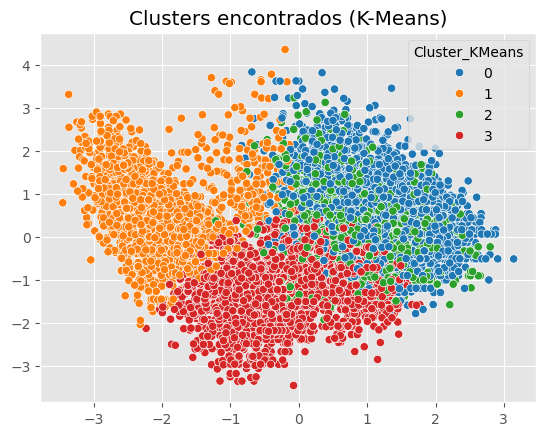

In [105]:
kmeans = KMeans(n_clusters=4, random_state=42)
train['Cluster_KMeans'] = kmeans.fit_predict(X_scaled)

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=train['Cluster_KMeans'], palette="tab10")
plt.title("Clusters encontrados (K-Means)")
plt.show()

### DBSCAN (alternativo)

In [106]:
from sklearn.cluster import DBSCAN

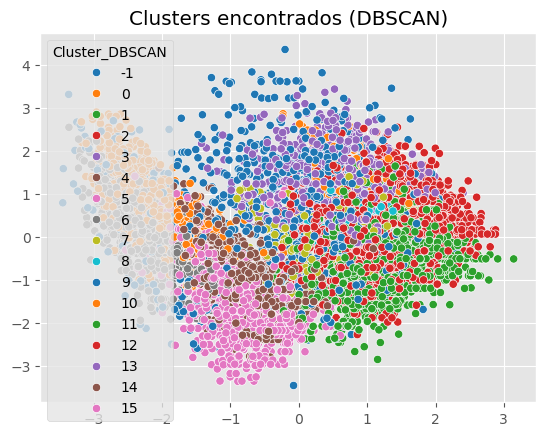

In [107]:
dbscan = DBSCAN(eps=1.2, min_samples=10)
train['Cluster_DBSCAN'] = dbscan.fit_predict(X_scaled)

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=train['Cluster_DBSCAN'], palette="tab10")
plt.title("Clusters encontrados (DBSCAN)")
plt.show()

# 4. Avaliação das métricas

### Métricas de qualidade dos clusters

In [108]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [109]:
km_sil = silhouette_score(X_scaled, train['Cluster_KMeans'])
km_db = davies_bouldin_score(X_scaled, train['Cluster_KMeans'])

print(f"K-Means → Silhouette: {km_sil:.3f}, Davies-Bouldin: {km_db:.3f}")

K-Means → Silhouette: 0.186, Davies-Bouldin: 1.790


In [110]:
mask = train['Cluster_DBSCAN'] != -1

X_dbscan = X_scaled[mask]
labels_dbscan = train.loc[mask, 'Cluster_DBSCAN']

db_sil = silhouette_score(X_dbscan, labels_dbscan)
print(f"DBSCAN → Silhouette (sem ruído): {db_sil:.3f}")

DBSCAN → Silhouette (sem ruído): 0.106


# 5. EDA de cada cluster

### Perfil dos clusters

In [111]:
grouped = train.groupby("Cluster_KMeans").mean(numeric_only=True)
grouped

,ID,Age,Work_Experience,Family_Size,Cluster_DBSCAN
Cluster_KMeans,,,,,
0,463533.659937,46.669438,2.389945,3.203484,2.104513
1,463514.183057,27.421616,2.350049,3.944499,2.568160
2,463497.900732,69.479251,1.163548,2.134255,2.363710
3,463376.372731,40.323152,3.389996,1.871625,3.370075


### Comparação com a coluna Segmentation

In [112]:
pd.crosstab(train['Segmentation'], train['Cluster_KMeans'], normalize='index')

Cluster_KMeans,0,1,2,3
Segmentation,,,,
A,0.228702,0.165822,0.197769,0.407708
B,0.415501,0.095264,0.174381,0.314855
C,0.562944,0.117259,0.136548,0.183249
D,0.085538,0.581570,0.108466,0.224427


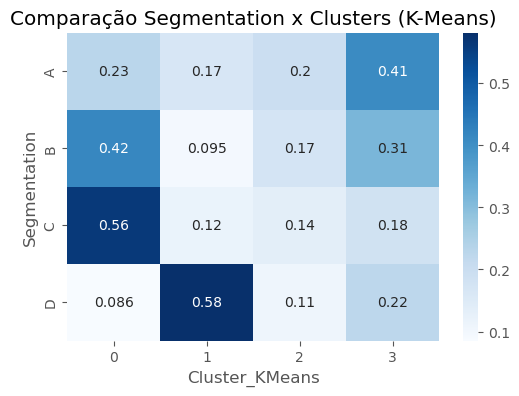

In [113]:
plt.figure(figsize=(6,4))
sns.heatmap(pd.crosstab(train['Segmentation'], train['Cluster_KMeans'], normalize='index'), annot=True, cmap='Blues')
plt.title("Comparação Segmentation x Clusters (K-Means)")
plt.show()